In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

% matplotlib inline

In [2]:
fname = "201218//201218_glass_R78_temp_coeff_DMM_dry_ice_1.txt"
df = pd.read_csv(fname, sep = ",", header = 0)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Time'] = df.Date_Time-df.Date_Time[0];
df.head()

,Date_Time,RTD,Rsamp,Time
0,2020-12-18 13:30:44.078126,1095.13226,37.693086,00:00:00
1,2020-12-18 13:30:44.625157,1095.13628,37.697065,00:00:00.547031
2,2020-12-18 13:30:45.168188,1095.13009,37.692562,00:00:01.090062
3,2020-12-18 13:30:45.719220,1095.13348,37.692401,00:00:01.641094
4,2020-12-18 13:30:46.262251,1095.13237,37.692917,00:00:02.184125


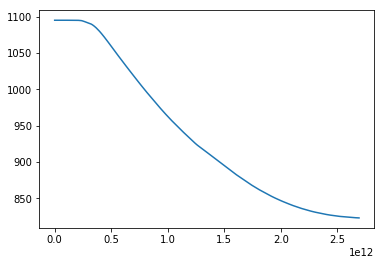

In [52]:
plt.plot(df['Time'], df['RTD'])

In [50]:
#for dry ice heating up only
fname2 = "201218//201218_glass_R78_temp_coeff_DMM_dry_ice_2_heating_up.txt"
df2 = pd.read_csv(fname2, sep = ",", header = 0)
df2['Date_Time'] = pd.to_datetime(df2['Date_Time'])
df2['Time'] = df2.Date_Time-df2.Date_Time[0];
df2.head()

,Date_Time,RTD,Rsamp,Time
0,2020-12-18 15:51:43.981005,753.054852,30.696119,00:00:00
1,2020-12-18 15:51:44.554037,753.044555,30.694424,00:00:00.573032
2,2020-12-18 15:51:45.103069,753.037849,30.695530,00:00:01.122064
3,2020-12-18 15:51:45.641100,753.033796,30.690077,00:00:01.660095
4,2020-12-18 15:51:46.216132,753.029375,30.693833,00:00:02.235127


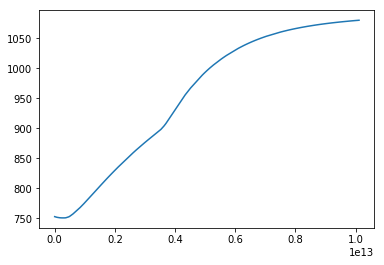

In [53]:
plt.plot(df2['Time'], df2['RTD'])

In [54]:
#for dry ice heating up only
df2['T'] = 9.91684E-6 * df2['RTD']**2 + 0.23605 * df2['RTD'] - 245.96823
df2['dT'] = df2['T'] - df2['T'].iloc[0]
mask2 = df2['Rsamp'].idxmax()

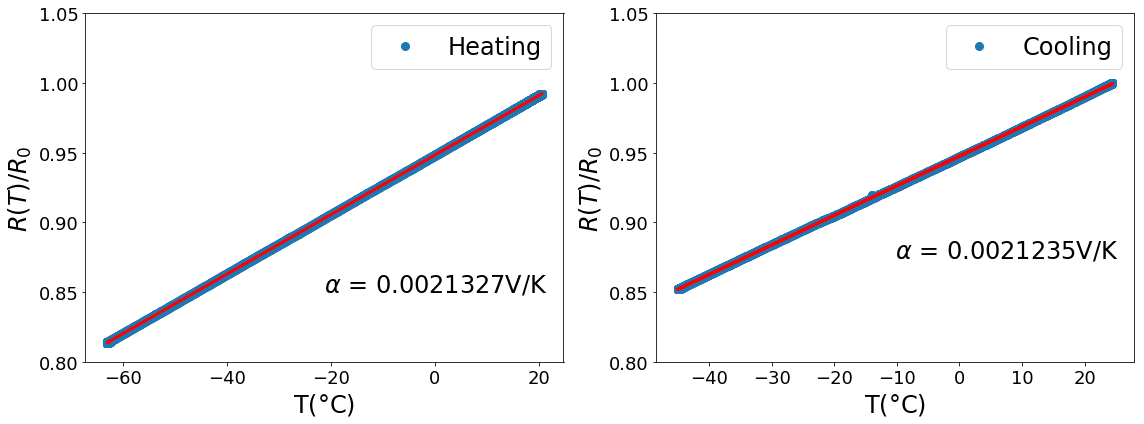

In [105]:
fig, axs = plt.subplots(1,2, figsize = (16,6))
fz = 24 #fontsize
ylim = [0.8,1.05]
#heating
x = df2['dT'][0 : mask2]
y = df2['Rsamp'][0 : mask2] / df['Rsamp'].iloc[0]
m1, b1 = np.polyfit(x, y, 1)
axs[0].plot(df2['T'][0 : mask2], y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
axs[0].plot(df2['T'][0 : mask2], np.polyval([m1,b1], x), color = 'red', linewidth = 3)
axs[0].text(0.5, 0.2, rf'$\alpha$ = {round(m1,7)}V/K', fontsize = fz, transform = axs[0].transAxes)
axs[0].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[0].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
axs[0].set_ylim(ylim)
axs[0].legend(fontsize = fz)
axs[0].tick_params(labelsize=18)


#cooling
df['T'] = 9.91684E-6 * df['RTD']**2 + 0.23605 * df['RTD'] - 245.96823
df['dT'] = df['T'] - df['T'].iloc[0]
mask = df['Rsamp'].idxmax()
x = df['dT'][mask:]
y = df['Rsamp'][mask:] / df['Rsamp'].iloc[0]
m2, b2 = np.polyfit(x, y, 1)
axs[1].plot(df['T'][mask:], y, marker = 'o', markersize = 8, ls = " ", label = 'Cooling')
axs[1].plot(df['T'][mask:], np.polyval([m2,b2], x), color = 'red', linewidth = 3)
axs[1].text(0.5, 0.3, rf'$\alpha$ = {round(m2,7)}V/K', fontsize = fz, transform = axs[1].transAxes)
axs[1].set_xlabel(r'T($\degree$C)', fontsize = fz)
axs[1].set_ylabel(r'$R(T) / R_0$', fontsize = fz)
axs[1].legend(fontsize = fz)
axs[1].tick_params(labelsize=18)
axs[1].set_ylim(ylim)
plt.tight_layout()

fig.savefig(fname[:-4] + "_analysis.jpg", dpi = 100)

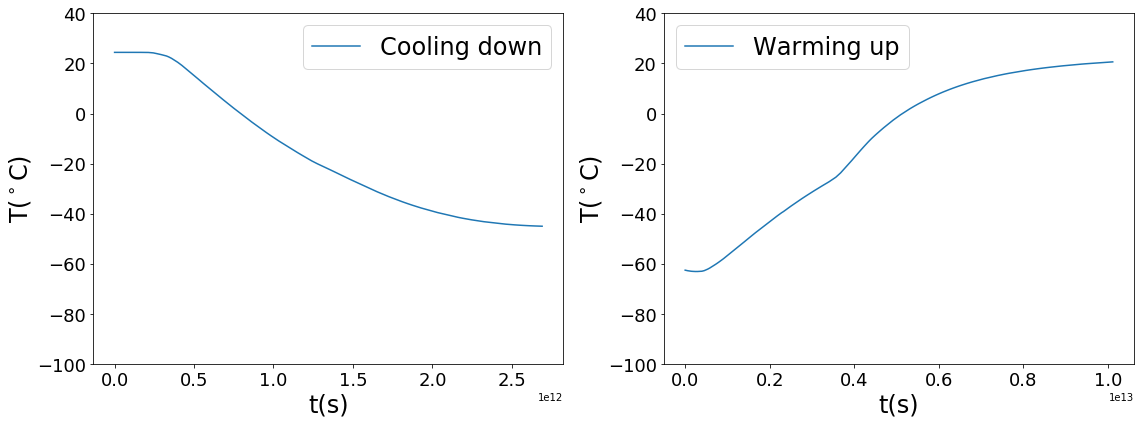

In [78]:
fig2, axs = plt.subplots(1,2, figsize = (16,6))
fz = 24 #fontsize

axs[0].plot(df['Time'], df['T'], label = 'Cooling down')
axs[0].set_xlabel('t(s)', fontsize = fz)
axs[0].set_ylabel('T($^\circ$C)', fontsize = fz)
axs[0].set_ylim([-100,40])
axs[0].legend(fontsize = fz)
axs[0].tick_params(labelsize=18)

axs[1].plot(df2['Time'], df2['T'], label = 'Warming up')
axs[1].set_xlabel('t(s)', fontsize = fz)
axs[1].set_ylabel('T($^\circ$C)', fontsize = fz)
axs[1].set_ylim([-100,40])
axs[1].legend(loc = 'upper left', fontsize = fz)
axs[1].tick_params(labelsize=18)
plt.tight_layout()

#fig2.savefig(fname[:-4] + "_temp_curves.jpg", dpi = 100)

In [21]:
se = (y - np.polyval([m2,b2], x))**2

In [26]:
df['Rsamp'][se.idxmax()-5:se.idxmax()+5]

2004    34.587511
2005    34.582211
2006    34.580386
2007    34.583702
2008    34.580755
2009    34.673587
2010    34.668651
2011    34.573448
2012    34.569171
2013    34.569171
Name: Rsamp, dtype: float64

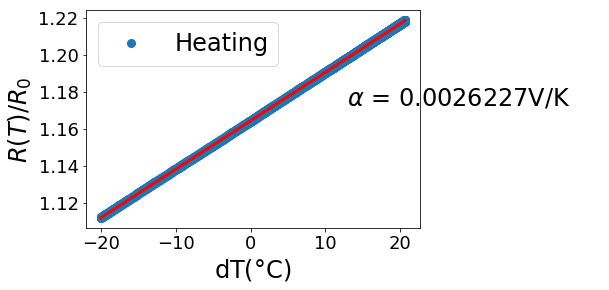

In [74]:
#heating
mask3 = df2['T'] > -20
x = df2['dT'][mask3]
y = df2['Rsamp'][mask3] / df2['Rsamp'].iloc[0]
m1, b1 = np.polyfit(x, y, 1)
plt.plot(df2['T'][mask3], y, marker = 'o', markersize = 8, ls = " ", label = 'Heating')
plt.plot(df2['T'][mask3], np.polyval([m1,b1], x), color = 'red', linewidth = 3)
plt.text(0.5, 0.4, rf'$\alpha$ = {round(m1,7)}V/K', fontsize = fz, transform = axs[0].transAxes)
plt.xlabel(r'dT($\degree$C)', fontsize = fz)
plt.ylabel(r'$R(T) / R_0$', fontsize = fz)
#axs[0].set_ylim(ylim)
plt.legend(fontsize = fz)
plt.tick_params(labelsize=18)

In [4]:
fname3 = "201218//201218_glass_R78_temp_coeff_DMM_dry_ice_temp_monitor_2.txt"
df3 = pd.read_csv(fname3, sep = ",", header = 0)
df3['Date_Time'] = pd.to_datetime(df3['Date_Time'])
df3['Time'] = df3.Date_Time-df3.Date_Time[0];
df3.head()

,Date_Time,RTD,Rsamp,Time
0,2020-12-18 14:47:20.187008,829.032204,9.900000e+37,00:00:00
1,2020-12-18 14:47:20.719039,829.003759,9.900000e+37,00:00:00.532031
2,2020-12-18 14:47:21.263070,828.989242,9.900000e+37,00:00:01.076062
3,2020-12-18 14:47:21.803101,828.961460,9.900000e+37,00:00:01.616093
4,2020-12-18 14:47:22.347132,828.938247,9.900000e+37,00:00:02.160124


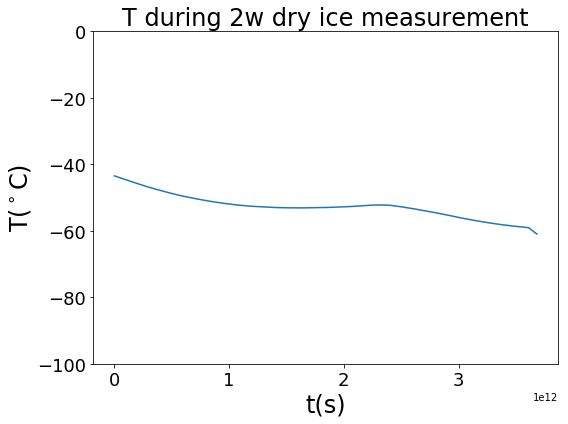

In [5]:
fig3, ax = plt.subplots(1,1, figsize = (8,6))
fz = 24 #fontsize

df3['T'] = 9.91684E-6 * df3['RTD']**2 + 0.23605 * df3['RTD'] - 245.96823


ax.plot(df3['Time'], df3['T'])
ax.set_xlabel('t(s)', fontsize = fz)
ax.set_ylabel('T($^\circ$C)', fontsize = fz)
ax.set_ylim([-100,0])
ax.set_title('T during 2w dry ice measurement', fontsize = fz)
ax.tick_params(labelsize=18)
plt.tight_layout()
#fig3.savefig(fname[:-4] + "_temp_monitor2.jpg", dpi = 100)

In [6]:
np.mean(df3['T'])

-52.70784737265432

0      -43.459390
1      -43.466572
2      -43.470237
3      -43.477252
4      -43.483113
5      -43.488304
6      -43.494370
7      -43.501496
8      -43.507826
9      -43.513147
10     -43.518860
11     -43.524776
12     -43.532595
13     -43.537079
14     -43.543572
15     -43.549880
16     -43.556024
17     -43.562071
18     -43.568248
19     -43.574016
20     -43.579638
21     -43.585518
22     -43.592197
23     -43.597035
24     -43.604799
25     -43.611235
26     -43.615998
27     -43.622510
28     -43.628092
29     -43.635204
          ...    
6624   -60.590735
6625   -60.603407
6626   -60.615818
6627   -60.627422
6628   -60.643153
6629   -60.655325
6630   -60.669271
6631   -60.678653
6632   -60.691423
6633   -60.700063
6634   -60.714580
6635   -60.724648
6636   -60.736714
6637   -60.751810
6638   -60.764826
6639   -60.774949
6640   -60.785682
6641   -60.795990
6642   -60.807964
6643   -60.818901
6644   -60.828987
6645   -60.839184
6646   -60.852008
6647   -60.863260
6648   -60